In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [22]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [23]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [24]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [25]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

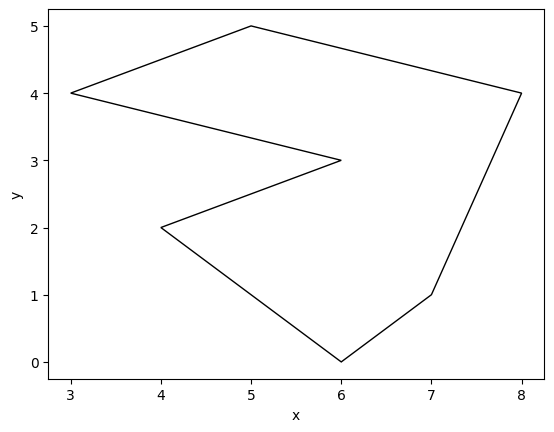

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [15]:
polygon = [(1, 0),(2, 1),(3, 3), (4,5), (-1, 4)]
pol1 = [(0.030693547033494514, -0.0404187105216232), (0.008516127678655797, 0.0360825149685729), (0.0003104825173654846, 0.014850897321514067), (-0.01410484006327968, -0.0016625830706427924), (-0.03384274328908614, -0.01446895561966241), (-0.04493145296650549, -0.0188500830706428)]
pol2 = [(0.027247732531639826, -0.0187377430410946), (-0.014889364242553715, -0.005931370492074997), (0.039445313176801125, 0.006200982449101486), (-0.0031353319844892036, 0.0146262275471407), (0.04099773253163984, 0.025747551076552466), (-0.0038006545651343565, 0.03821691382165052), (0.042106603499381764, 0.05068627656674857), (-0.00513129972642469, 0.05304534519419954), (-0.050151461016747265, -0.04536151755089854)]


In [32]:
def draw_polygon_by_clicking():
    %matplotlib tk
    plt.figure()
    plt.title("Wprowadź wielokąt")
    plt.xlabel("X")
    plt.ylabel("Y")

    # Draw points by clicking on the plot
    polygon = plt.ginput(n=-1, timeout=0, show_clicks=True)

    plt.close()

    return polygon

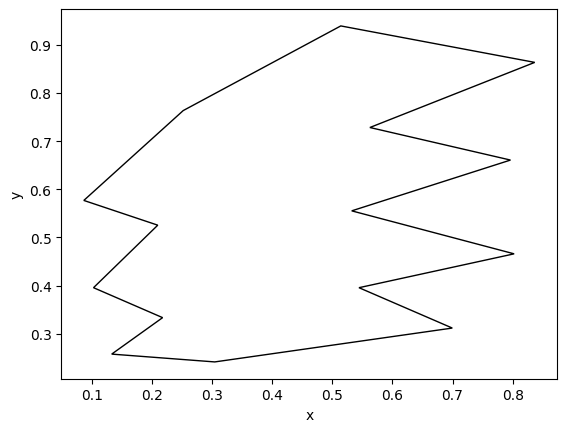

In [8]:
pol_click = draw_polygon_by_clicking()
%matplotlib inline
draw_polygon(pol_click)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [2]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """

    max_y = max(polygon, key=lambda x: x[1])
    min_y = min(polygon, key=lambda x: x[1])

    # y_sorted = sorted(polygon, key=lambda x: (x[1], x[0]))

    direction = 'up'
    n = len(polygon)
    head = polygon.index(min_y)
    i = head

    while i < n+head:
        if polygon[i%n] == max_y:
            direction = 'down'

        if direction == 'up':
            if polygon[i%n][1] > polygon[(i+1)%n][1]:
                return False
        elif direction == 'down':
            if polygon[i%n][1] < polygon[(i+1)%n][1]:
                return False
        i+=1
            
        
    return True

Przeprowadź test poprawności powyższej funkcji.

In [3]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.038s


Sprawdź monotoniczność swojego wielokątu.

In [11]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

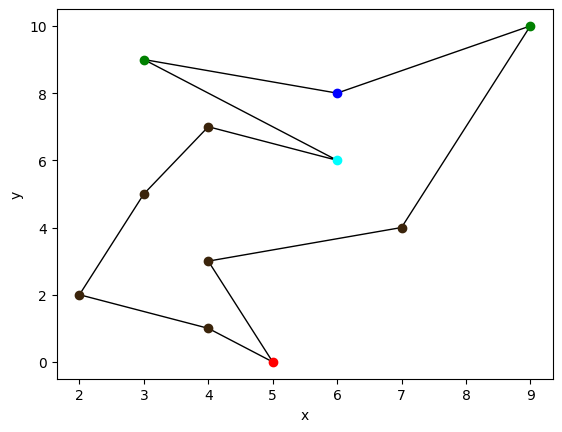

In [12]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [38]:
def orient(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0]-c[0])*(b[1]-c[1]) - (a[1]-c[1])*(b[0]-c[0])
    

In [39]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    tab = [-1 for _ in range(n)]

    for i in range(n):
        if polygon[i-1][1] <= polygon[i][1] <= polygon[(i+1)%n][1] or polygon[i-1][1] >= polygon[i][1] >= polygon[(i+1)%n][1]:
            tab[i] = 4
        elif polygon[i-1][1] > polygon[i][1] and polygon[(i+1)%n][1] > polygon[i][1]:
            if orient(polygon[i-1], polygon[i], polygon[(i+1)%n]) > 0:
                tab[i] = 1
            else:
                tab[i] = 2
        elif polygon[i-1][1] < polygon[i][1] and polygon[(i+1)%n][1] < polygon[i][1]:
            if orient(polygon[i-1], polygon[i], polygon[(i+1)%n]) > 0:
                tab[i] = 0
            else:
                tab[i] = 3

    return tab


Przeprowadź test poprawności powyższej funkcji. 

In [40]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.047s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

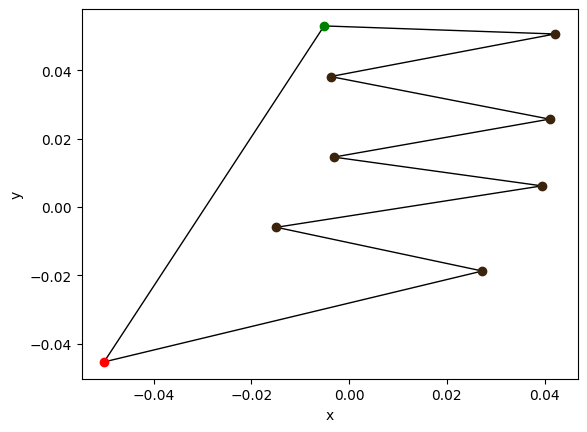

In [16]:
colors = color_vertex(pol2)
draw_polygon_colors(pol2,colors)

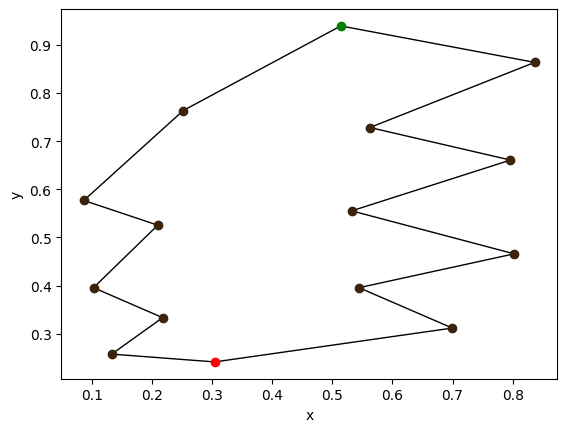

In [65]:
colors_1 = color_vertex(pol_click)
draw_polygon_colors(pol_click,colors_1)

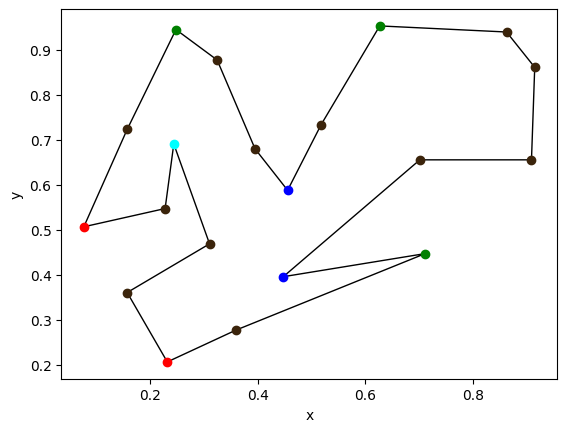

In [66]:
pol_click_colors = draw_polygon_by_clicking()
%matplotlib inline
colors = color_vertex(pol_click_colors)
draw_polygon_colors(pol_click_colors, colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

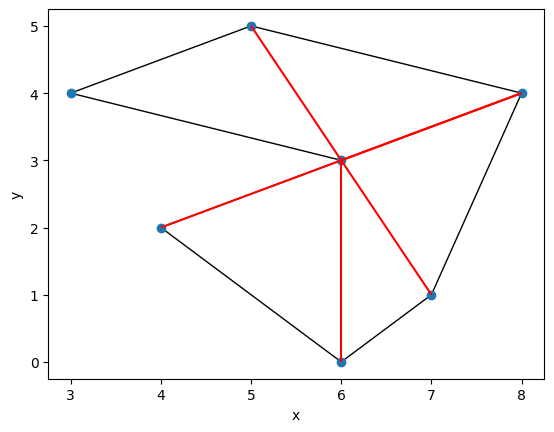

In [17]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [7]:
eps = 10**(-12)
def is_in_polygon(a, b, c, is_in_right):
    o = orient(a,b,c)
    if is_in_right:
        return o < eps
    else:
        return o > eps
    
    

In [11]:
triangles = []

def triangulation(polygon):
    triangles.clear()
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    # print(polygon)
    if not is_y_monotonic(polygon):
        return []
    
    n = len(polygon)
    
    stack = []
    
    max_y = max(polygon, key=lambda x: x[1])
    min_y = min(polygon, key=lambda x: x[1])
    start = polygon.index(min_y)

    right = []
    left = []
    flag = None
    for _ in range(2):
        for vert in polygon:
            if vert == min_y:
                flag = "right"
            if vert == max_y:
                flag = "left"
            if flag == "right":
                if vert not in right:
                    right.append(vert)
            if flag == "left":
                if vert not in left:
                    left.append(vert)

    tab = right + left
    tab.sort(key= lambda x: x[1],  reverse=True)

    stack.append(tab[0])
    stack.append(tab[1])

    lines = []

    for i in range(2, n):
        if (tab[i] in left and stack[-1] in right) or (tab[i] in right and stack[-1] in left):
            while len(stack) > 0:
                u = stack.pop()
                if abs(polygon.index(tab[i]) -polygon.index(u))!= 1 and abs(polygon.index(tab[i]) -polygon.index(u))!= n-1:
                    triangles.append((tab[i], u, stack[-1]))
                    lines.append([polygon.index(tab[i]), polygon.index(u)])
            # stack.pop()
            stack.append(tab[i-1])
            stack.append(tab[i])
        else:
            u = stack.pop()
            while len(stack) > 0 and is_in_polygon(tab[i], stack[-1], u, tab[i] in right):
                if abs(polygon.index(tab[i]) - polygon.index(stack[-1])) != 1 and abs(polygon.index(tab[i]) - polygon.index(stack[-1])) != n-1:
                    triangles.append((tab[i], u, stack[-1]))
                    lines.append([polygon.index(stack[-1]), polygon.index(tab[i])])
                u = stack.pop()
            stack.append(u)
            stack.append(tab[i])

    if triangles[-1][0] in [stack[-2], stack[-1]]:
        triangles.append((stack[-2], stack[-1], triangles[-1][2]))
    else:
        triangles.append((stack[-2], stack[-1], triangles[-1][0]))


    return lines

    
    

In [18]:
def triangulation_step_by_step(polygon):
    triangles.clear()
    vis = Visualizer()
    # print(polygon)
    if not is_y_monotonic(polygon):
        return []
    
    bounds = []
    
    for i in range(len(polygon)):
        bounds.append((polygon[i-1], polygon[i]))

    vis.add_line_segment(bounds)
    vis.add_point(polygon)


    
    n = len(polygon)
    
    stack = []
    
    max_y = max(polygon, key=lambda x: x[1])
    min_y = min(polygon, key=lambda x: x[1])
    start = polygon.index(min_y)

    right = []
    left = []
    flag = None
    for _ in range(2):
        for vert in polygon:
            if vert == min_y:
                flag = "right"
            if vert == max_y:
                flag = "left"
            if flag == "right":
                if vert not in right:
                    right.append(vert)
            if flag == "left":
                if vert not in left:
                    left.append(vert)

    tab = right + left
    tab.sort(key= lambda x: x[1],  reverse=True)

    stack.append(tab[0])
    stack.append(tab[1])
    print(stack)
    
    to_remove_l = []
    lines = []

    for i in range(2, n):
        if (tab[i] in left and stack[-1] in right) or (tab[i] in right and stack[-1] in left):
            while len(stack) > 0:
                u = stack.pop()
                print(stack)
                if abs(polygon.index(tab[i]) -polygon.index(u))!= 1 and abs(polygon.index(tab[i]) -polygon.index(u))!= n-1:
                    triangles.append((tab[i], u, stack[-1]))
                    f, s = polygon.index(tab[i]), polygon.index(u)
                    lines.append([f, s])
                    t = vis.add_line_segment((polygon[f], polygon[s]), color="green")
                    to_remove_l.append(t)
            # stack.pop()
            stack.append(tab[i-1])
            stack.append(tab[i])
            print(stack)
        else:
            u = stack.pop()
            while len(stack) > 0 and is_in_polygon(tab[i], stack[-1], u, tab[i] in right):
                if abs(polygon.index(tab[i]) - polygon.index(stack[-1])) != 1 and abs(polygon.index(tab[i]) - polygon.index(stack[-1])) != n-1:
                    triangles.append((tab[i], u, stack[-1]))
                    f, s = polygon.index(stack[-1]), polygon.index(tab[i])
                    lines.append([f, s])
                    t = vis.add_line_segment((polygon[f], polygon[s]), color="green")
                    to_remove_l.append(t)
                u = stack.pop()
                print(stack)
            stack.append(u)
            stack.append(tab[i])
            print(stack)

    if triangles[-1][0] in [stack[-2], stack[-1]]:
        triangles.append((stack[-2], stack[-1], triangles[-1][2]))
    else:
        triangles.append((stack[-2], stack[-1], triangles[-1][0]))


    return lines, vis

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: Przechowuje trójki punktów tworzące wyznaczone trójkąty, oraz listęprzekątnych wieloboku

Przeprowadź testy poprawności powyższej funkcji.


In [19]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.047s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [20]:
def translate(polygon, tri):
    res = []
    for elem in tri:
        res.append((polygon[elem[0]], polygon[elem[1]]))
    return res

[(4, 5), (-1, 4)]
[(4, 5)]
[]
[(-1, 4), (3, 3)]
[]
[(-1, 4), (2, 1)]
[]
[(-1, 4), (1, 0)]
[((3, 3), (-1, 4), (4, 5)), ((2, 1), (3, 3), (-1, 4)), ((-1, 4), (1, 0), (2, 1))]


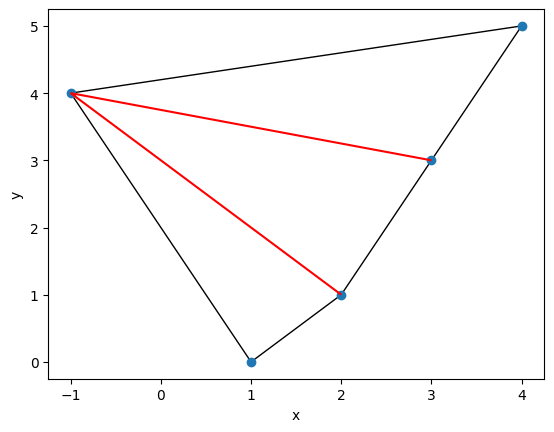

In [47]:
tri, vis = triangulation_step_by_step(polygon)

tri = translate(polygon, tri)

draw_polygon_tri(polygon,tri)
print(triangles)
polygon_triangles = triangles[:]

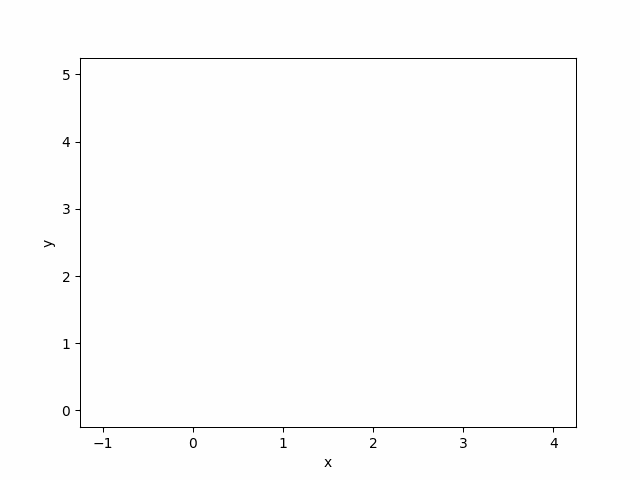

In [48]:

vis.show_gif(interval=1000)
# vis.save_gif()

[(-2, 7), (1, 6)]
[]
[(-2, 7), (-0.7, 5)]
[(-2, 7), (-0.7, 5), (0.8, 4)]
[(-2, 7)]
[]
[(-2, 7), (-0.8, 3)]
[(-2, 7), (-0.8, 3), (0.5, 2)]
[(-2, 7)]
[]
[(-2, 7), (-1, 1)]
[(-2, 7), (-1, 1), (0, 0)]
[(-2, 7)]
[]
[(-2, 7), (-3, -4)]
[((-0.7, 5), (1, 6), (-2, 7)), ((-0.8, 3), (0.8, 4), (-0.7, 5)), ((-0.8, 3), (-0.7, 5), (-2, 7)), ((-1, 1), (0.5, 2), (-0.8, 3)), ((-1, 1), (-0.8, 3), (-2, 7)), ((-3, -4), (0, 0), (-1, 1)), ((-2, 7), (-3, -4), (-1, 1))]


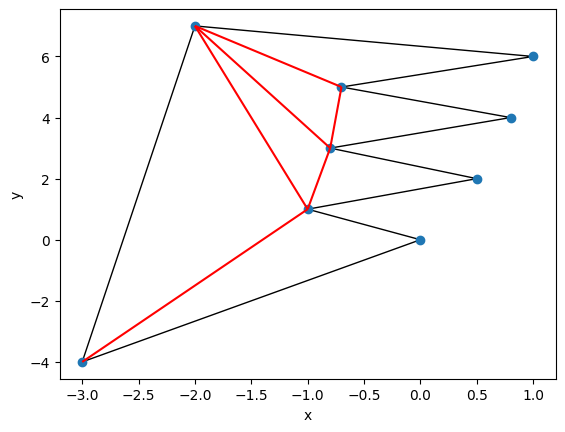

In [28]:
pol3 = [(0, 0), (-1, 1), (0.5, 2), (-0.8, 3), (0.8, 4), (-0.7, 5), (1, 6), (-2, 7), (-3, -4)]
# draw_polygon(pol3)
tri, vis = triangulation_step_by_step(pol3)
# print(tri)
tri = translate(pol3, tri)
draw_polygon_tri(pol3,tri)
print(triangles)
pol3_triangles = triangles[:]

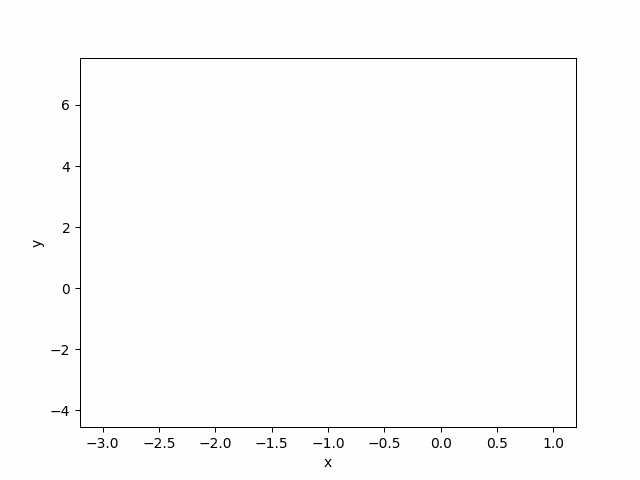

In [29]:

vis.show_gif(interval=200)
# vis.save_gif()

[(0.5826612903225806, 0.9448051948051949), (0.2963709677419355, 0.8933982683982685)]
[(0.5826612903225806, 0.9448051948051949)]
[]
[(0.2963709677419355, 0.8933982683982685), (0.8205645161290323, 0.87987012987013)]
[]
[(0.2963709677419355, 0.8933982683982685), (0.8608870967741936, 0.787878787878788)]
[]
[(0.2963709677419355, 0.8933982683982685), (0.7217741935483871, 0.7012987012987013)]
[(0.2963709677419355, 0.8933982683982685)]
[]
[(0.7217741935483871, 0.7012987012987013), (0.11491935483870966, 0.6931818181818182)]
[(0.7217741935483871, 0.7012987012987013)]
[]
[(0.11491935483870966, 0.6931818181818182), (0.8790322580645161, 0.6525974025974026)]
[(0.11491935483870966, 0.6931818181818182)]
[]
[(0.8790322580645161, 0.6525974025974026), (0.4657258064516129, 0.6147186147186148)]
[(0.8790322580645161, 0.6525974025974026)]
[]
[(0.4657258064516129, 0.6147186147186148), (0.7258064516129032, 0.5497835497835498)]
[]
[(0.4657258064516129, 0.6147186147186148), (0.8205645161290323, 0.503787878787878

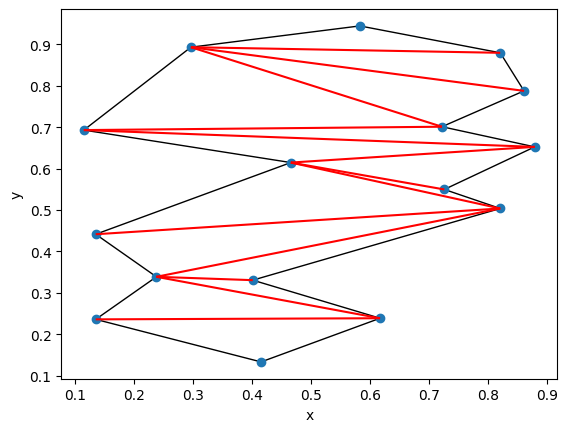

In [33]:
pol_click_1 = draw_polygon_by_clicking()
%matplotlib inline

# save to file
# np.savetxt('polygon_coordinates1.csv', pol_click_1, delimiter=',')

# draw_polygon(pol3)
tri, vis = triangulation_step_by_step(pol_click_1)
# print(tri)
tri = translate(pol_click_1, tri)
draw_polygon_tri(pol_click_1,tri)
print(triangles)
print(f"Liczba trójkątów {len(triangles)}")
pol_click_1_triangles = triangles[:]

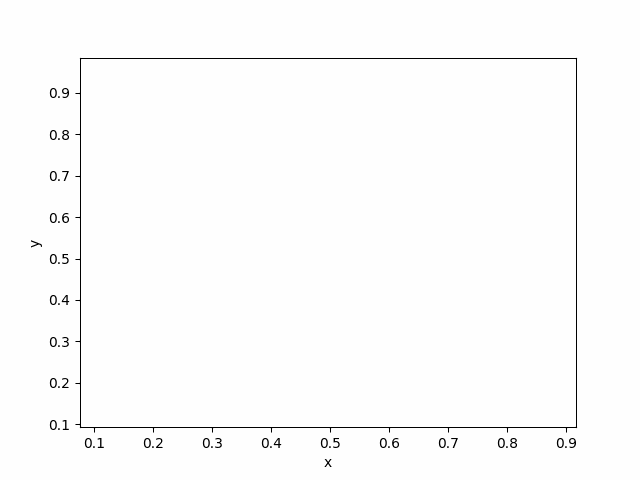

In [34]:

vis.show_gif(interval=200)

# vis.save_gif()

[(0.7762096774193549, 0.9772727272727274), (0.5725806451612904, 0.9556277056277057)]
[(0.7762096774193549, 0.9772727272727274)]
[]
[(0.5725806451612904, 0.9556277056277057), (0.8951612903225806, 0.8988095238095238)]
[(0.5725806451612904, 0.9556277056277057)]
[]
[(0.8951612903225806, 0.8988095238095238), (0.33870967741935487, 0.8392857142857143)]
[(0.8951612903225806, 0.8988095238095238)]
[]
[(0.33870967741935487, 0.8392857142857143), (0.9153225806451614, 0.787878787878788)]
[(0.33870967741935487, 0.8392857142857143)]
[]
[(0.9153225806451614, 0.787878787878788), (0.7217741935483871, 0.7797619047619049)]
[(0.9153225806451614, 0.787878787878788)]
[]
[(0.7217741935483871, 0.7797619047619049), (0.8024193548387096, 0.6850649350649352)]
[(0.7217741935483871, 0.7797619047619049)]
[]
[(0.8024193548387096, 0.6850649350649352), (0.33669354838709675, 0.6607142857142858)]
[(0.8024193548387096, 0.6850649350649352)]
[]
[(0.33669354838709675, 0.6607142857142858), (0.9032258064516129, 0.609307359307359

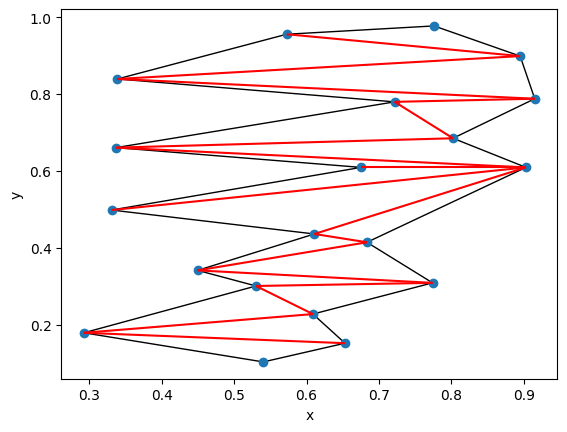

In [36]:
pol_click_2 = draw_polygon_by_clicking()
%matplotlib inline
# save to file
# np.savetxt('polygon_coordinates2.csv', pol_click_2, delimiter=',')

tri, vis = triangulation_step_by_step(pol_click_2)
tri = translate(pol_click_2, tri)
draw_polygon_tri(pol_click_2, tri)

print(triangles)
pol_click_2_triangles = triangles[:]

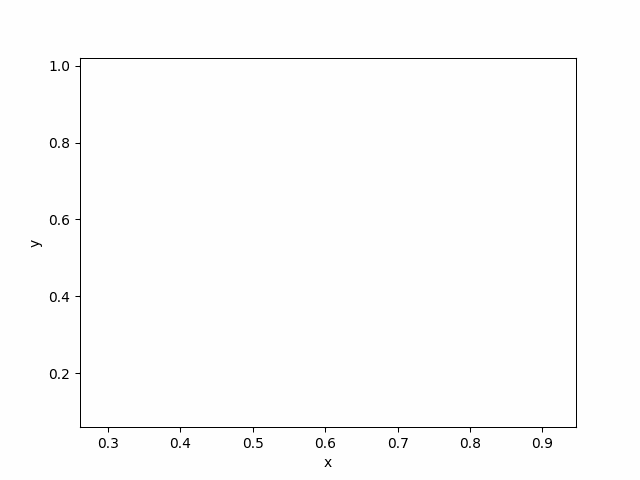

In [37]:

vis.show_gif(interval=200)
# vis.save_gif()

[(0.3911290322580645, 0.9664502164502166), (0.23387096774193547, 0.933982683982684)]
[(0.3911290322580645, 0.9664502164502166)]
[]
[(0.23387096774193547, 0.933982683982684), (0.5463709677419355, 0.9231601731601732)]
[]
[(0.23387096774193547, 0.933982683982684), (0.6512096774193549, 0.8663419913419915)]
[(0.23387096774193547, 0.933982683982684)]
[]
[(0.6512096774193549, 0.8663419913419915), (0.16532258064516128, 0.8419913419913421)]
[(0.6512096774193549, 0.8663419913419915)]
[]
[(0.16532258064516128, 0.8419913419913421), (0.6995967741935484, 0.8122294372294373)]
[(0.16532258064516128, 0.8419913419913421)]
[]
[(0.6995967741935484, 0.8122294372294373), (0.15725806451612903, 0.7635281385281386)]
[(0.6995967741935484, 0.8122294372294373)]
[]
[(0.15725806451612903, 0.7635281385281386), (0.7056451612903226, 0.7121212121212122)]
[(0.15725806451612903, 0.7635281385281386)]
[]
[(0.7056451612903226, 0.7121212121212122), (0.16129032258064516, 0.6661255411255411)]
[]
[(0.7056451612903226, 0.7121212

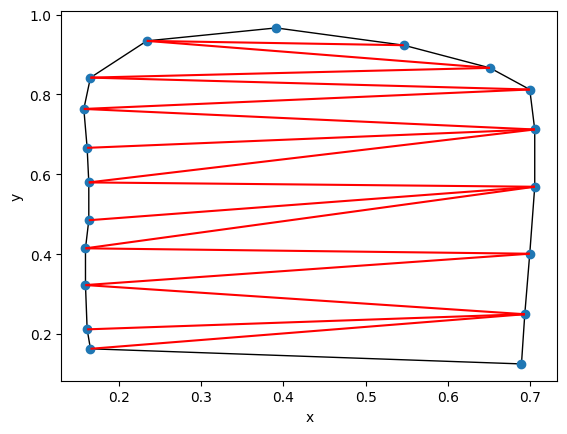

In [42]:
pol_click_3 = draw_polygon_by_clicking()
%matplotlib inline
# save to file
# np.savetxt('polygon_coordinates3.csv', pol_click_3, delimiter=',')

tri, vis = triangulation_step_by_step(pol_click_3)
tri = translate(pol_click_3, tri)
draw_polygon_tri(pol_click_3, tri)

print(triangles)
pol_click_3_triangles = triangles[:]

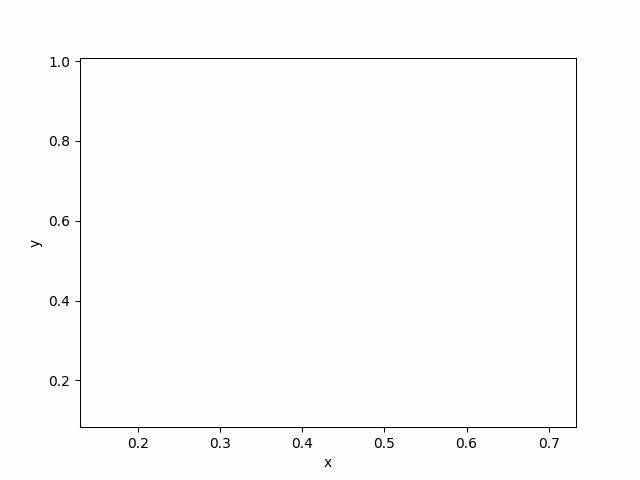

In [43]:
vis.show_gif(interval=200)
# vis.save_gif()

[(0.4838709677419355, 0.7418831168831169), (0.5141129032258065, 0.7202380952380953)]
[(0.4838709677419355, 0.7418831168831169)]
[]
[(0.5141129032258065, 0.7202380952380953), (0.4576612903225806, 0.7202380952380953)]
[(0.5141129032258065, 0.7202380952380953)]
[]
[(0.4576612903225806, 0.7202380952380953), (0.5383064516129032, 0.6985930735930737)]
[(0.4576612903225806, 0.7202380952380953)]
[]
[(0.5383064516129032, 0.6985930735930737), (0.4415322580645161, 0.6931818181818182)]
[]
[(0.5383064516129032, 0.6985930735930737), (0.4254032258064516, 0.6661255411255411)]
[(0.5383064516129032, 0.6985930735930737)]
[]
[(0.4254032258064516, 0.6661255411255411), (0.5483870967741936, 0.658008658008658)]
[(0.4254032258064516, 0.6661255411255411)]
[]
[(0.5483870967741936, 0.658008658008658), (0.4375, 0.6255411255411256)]
[(0.5483870967741936, 0.658008658008658)]
[]
[(0.4375, 0.6255411255411256), (0.5201612903225806, 0.6147186147186148)]
[(0.4375, 0.6255411255411256)]
[]
[(0.5201612903225806, 0.6147186147

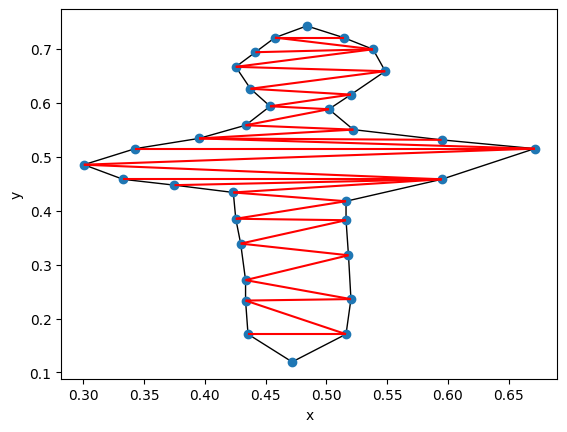

In [44]:
pol_click_4 = draw_polygon_by_clicking()
%matplotlib inline
# save to file
# np.savetxt('polygon_coordinates_4.csv', pol_click_4, delimiter=',')

tri, vis = triangulation_step_by_step(pol_click_4)
tri = translate(pol_click_4, tri)
draw_polygon_tri(pol_click_4, tri)

print(triangles)
pol_click_4_triangles = triangles[:]

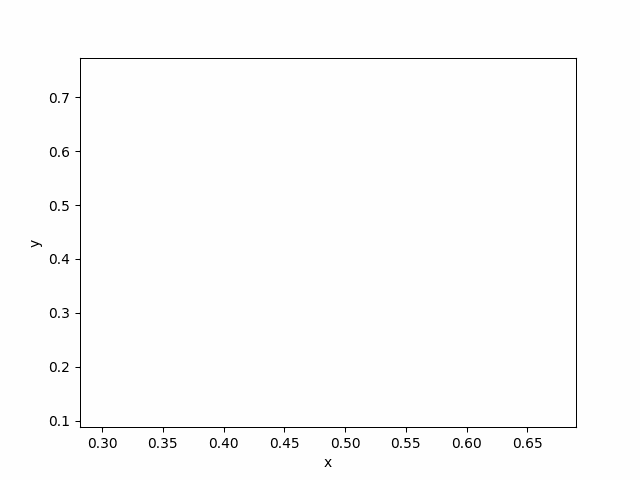

In [45]:
vis.show_gif(interval=200)
# vis.save_gif()